In [504]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [505]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [506]:
data.shape

(889, 15)

In [507]:
missingData = data.isnull().sum()
missingData

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

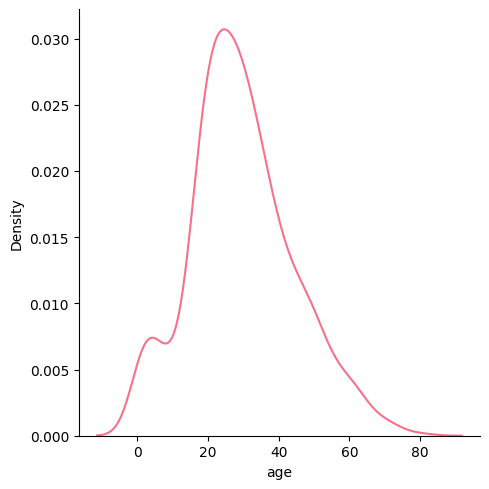

In [508]:
# show the Distribution for age column
sns.set_palette("husl")
sns.displot(data=data, x="age", kind="kde")

In [509]:
# fill all null values to the median
data['age'].fillna(data['age'].median(), inplace=True)

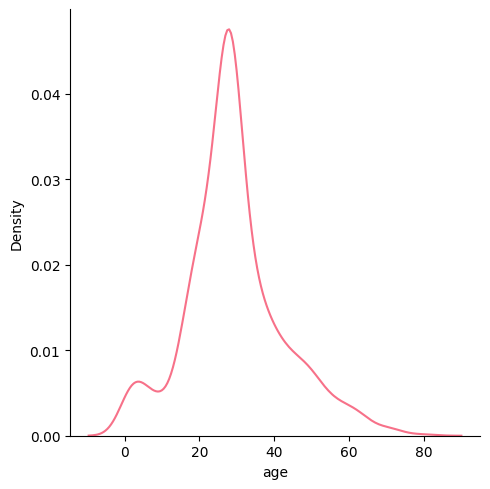

In [510]:
sns.set_palette("husl")
sns.displot(data=data, x="age", kind="kde")

<Axes: xlabel='embarked', ylabel='count'>

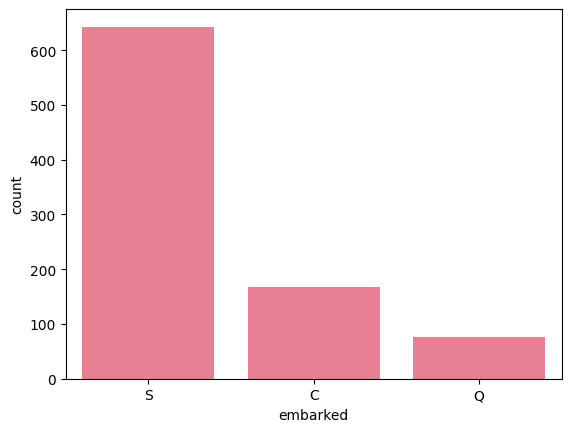

In [511]:
sns.countplot(data=data, x="embarked")

In [512]:
# fill all null values for either 'S' or 'C' or 'Q'
fillList = ['S', 'C', 'Q']
data['embarked'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<Axes: xlabel='embarked', ylabel='count'>

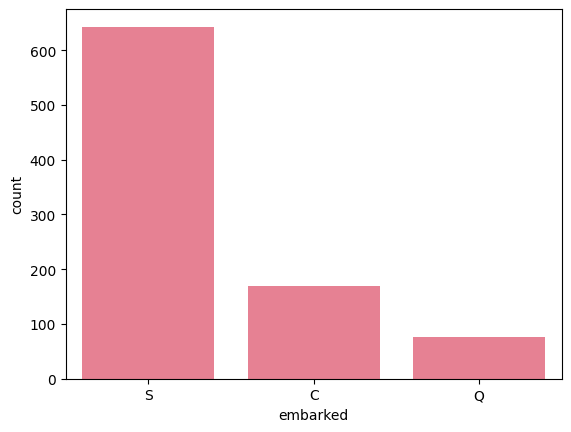

In [513]:
sns.countplot(data=data, x="embarked")

<Axes: xlabel='deck', ylabel='count'>

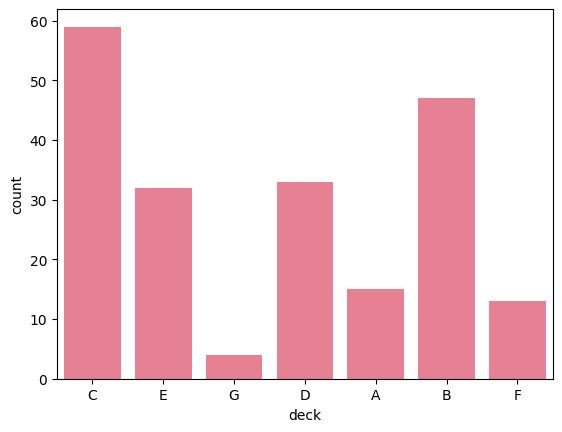

In [514]:
sns.countplot(data=data, x="deck")

In [515]:
fillList = ['C', 'E', 'G', 'D', 'A', 'B', 'F']
data['deck'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<Axes: xlabel='deck', ylabel='count'>

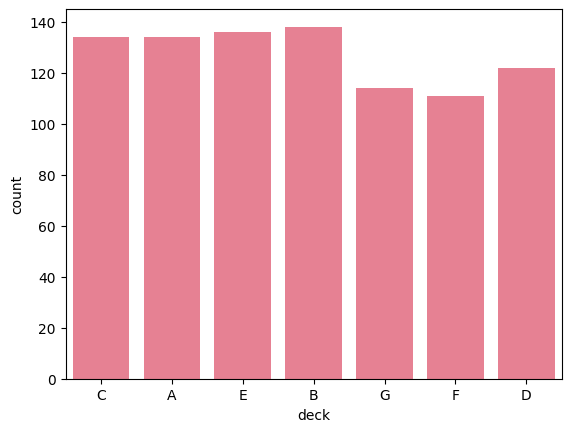

In [516]:
sns.countplot(data=data, x="deck")

<Axes: xlabel='embark_town', ylabel='count'>

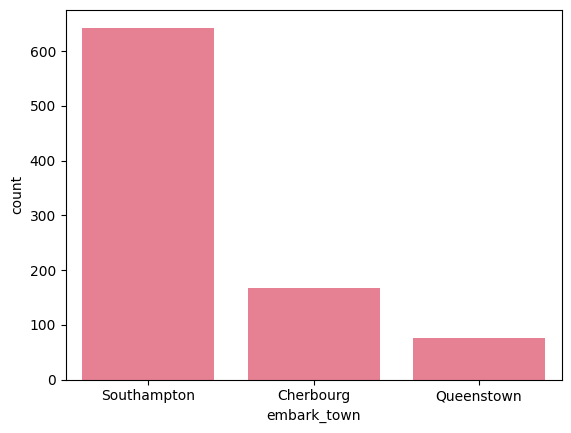

In [517]:
sns.countplot(data=data, x="embark_town")

In [518]:
fillList = ['Southampton', 'Cherbourg', 'Queenstown']
data['embark_town'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<Axes: xlabel='embark_town', ylabel='count'>

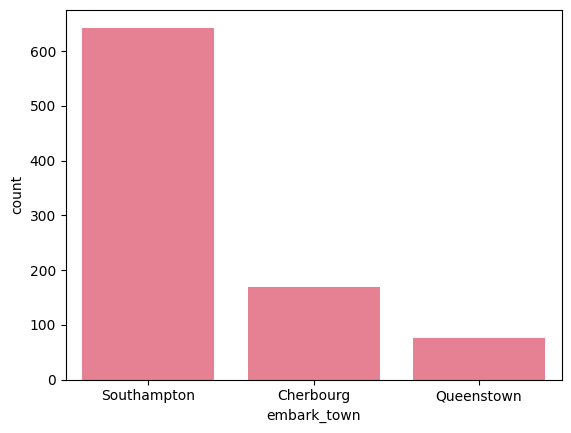

In [519]:
sns.countplot(data=data, x="embark_town")

In [520]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [521]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [522]:
# lable encode for categorical data
le = LabelEncoder()
data['who'] = le.fit_transform(data['who'])
data['sex'] = le.fit_transform(data['sex'])
data['adult_male'] = le.fit_transform(data['adult_male'])
data['alone'] = le.fit_transform(data['alone'])
data['alive'] = le.fit_transform(data['alive'])
data['embark_town'] = le.fit_transform(data['embark_town'])
data['deck'] = le.fit_transform(data['deck'])
data['class'] = le.fit_transform(data['class'])
data['embarked'] = le.fit_transform(data['embarked'])
print(data)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0           0       3    1  22.0      1      0   7.2500         2      2    1   
1           1       1    0  38.0      1      0  71.2833         0      0    2   
2           1       3    0  26.0      0      0   7.9250         2      2    2   
3           1       1    0  35.0      1      0  53.1000         2      0    2   
4           0       3    1  35.0      0      0   8.0500         2      2    1   
..        ...     ...  ...   ...    ...    ...      ...       ...    ...  ...   
884         0       2    1  27.0      0      0  13.0000         2      1    1   
885         1       1    0  19.0      0      0  30.0000         2      0    2   
886         0       3    0  28.0      1      2  23.4500         2      2    2   
887         1       1    1  26.0      0      0  30.0000         0      0    1   
888         0       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  deck  emba

In [523]:
# drop_duplicates
data = data.drop(columns=['survived','sex'])
print(data)

     pclass   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0         3  22.0      1      0   7.2500         2      2    1           1   
1         1  38.0      1      0  71.2833         0      0    2           0   
2         3  26.0      0      0   7.9250         2      2    2           0   
3         1  35.0      1      0  53.1000         2      0    2           0   
4         3  35.0      0      0   8.0500         2      2    1           1   
..      ...   ...    ...    ...      ...       ...    ...  ...         ...   
884       2  27.0      0      0  13.0000         2      1    1           1   
885       1  19.0      0      0  30.0000         2      0    2           0   
886       3  28.0      1      2  23.4500         2      2    2           0   
887       1  26.0      0      0  30.0000         0      0    1           1   
888       3  32.0      0      0   7.7500         1      2    1           1   

     deck  embark_town  alive  alone  
0       2            2  

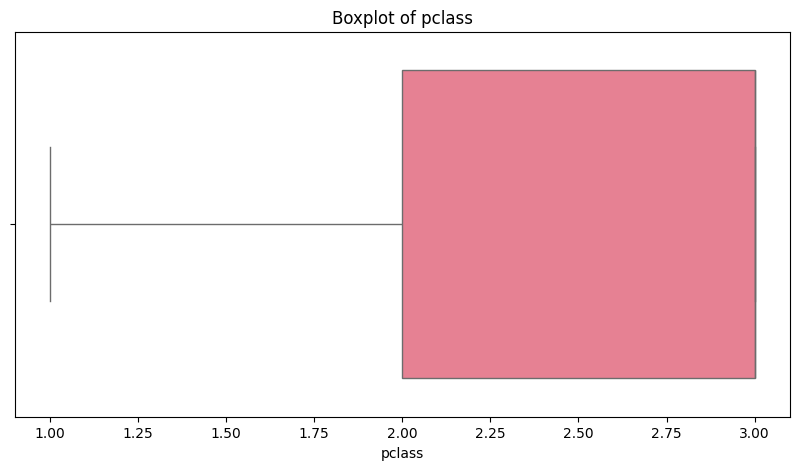

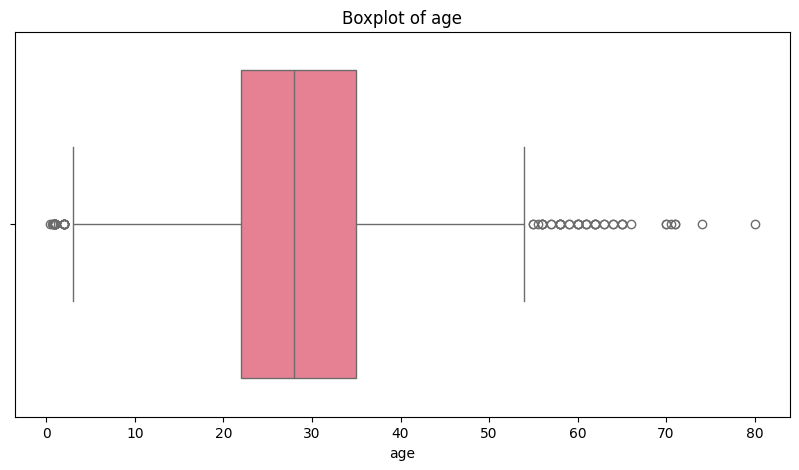

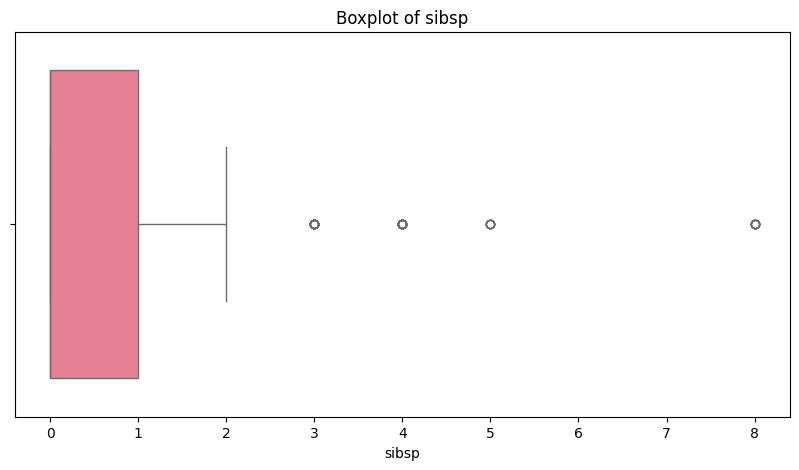

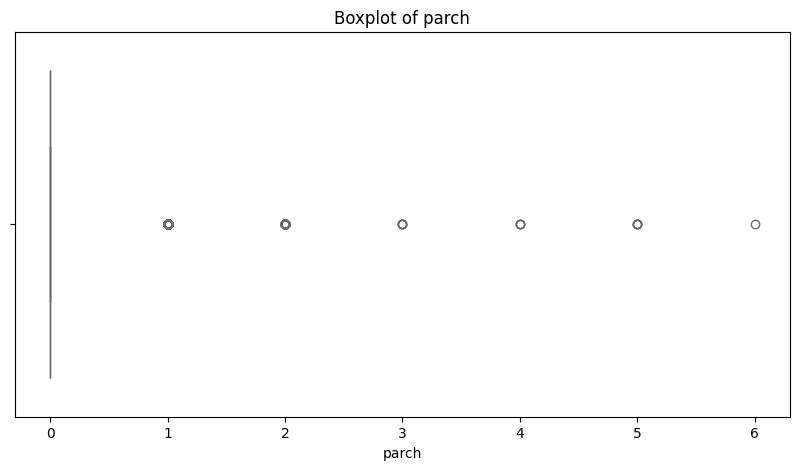

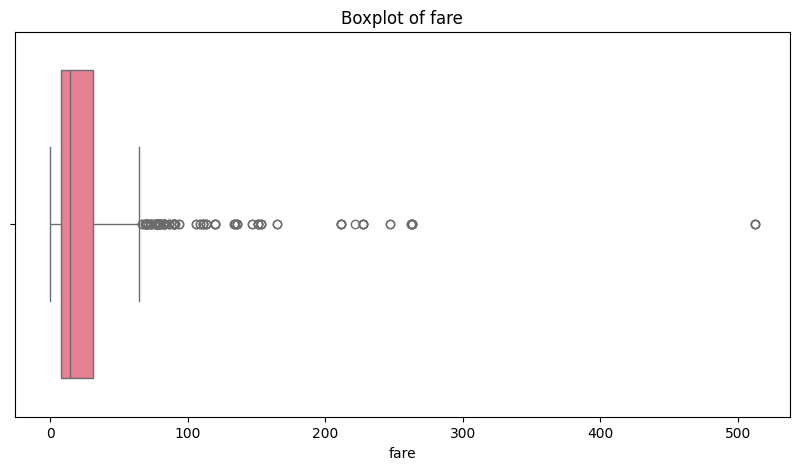

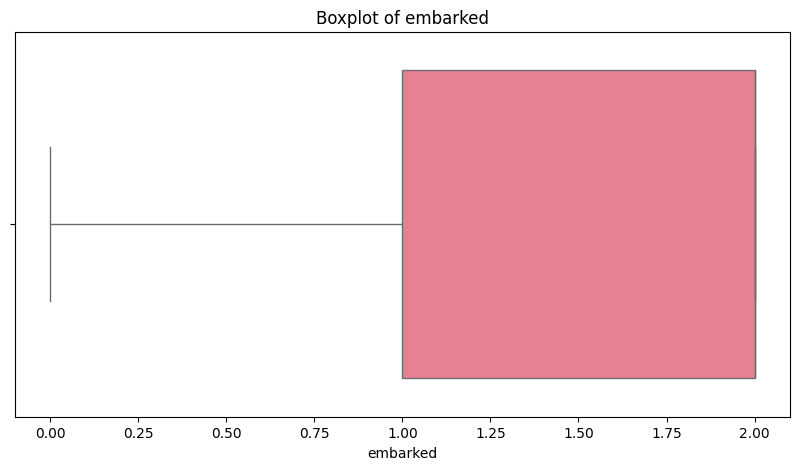

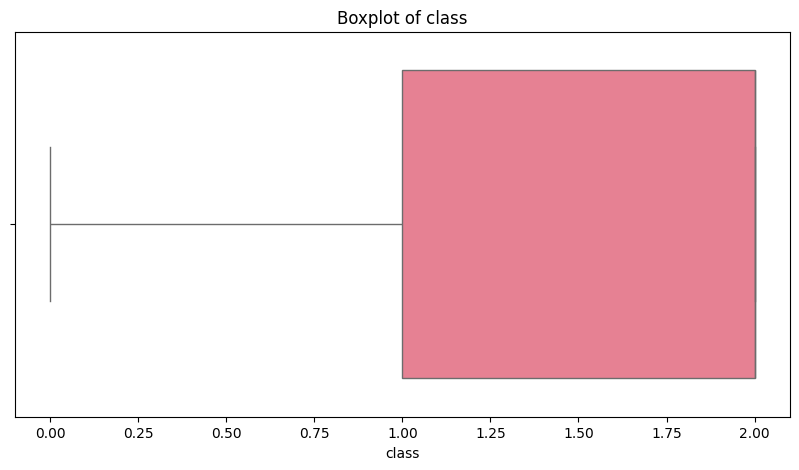

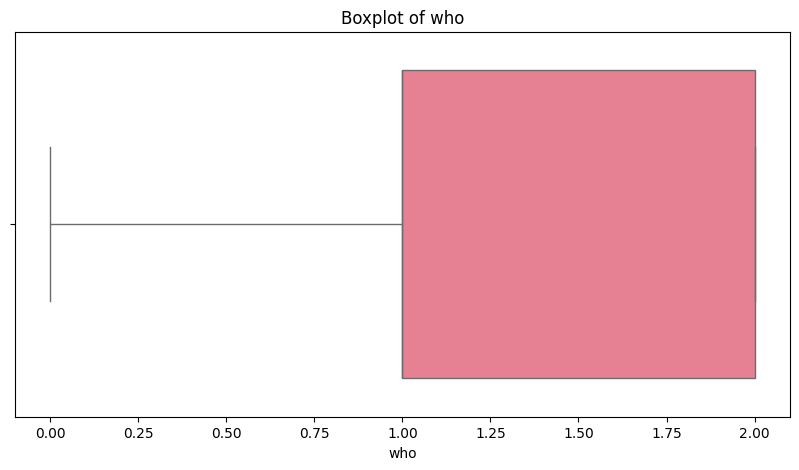

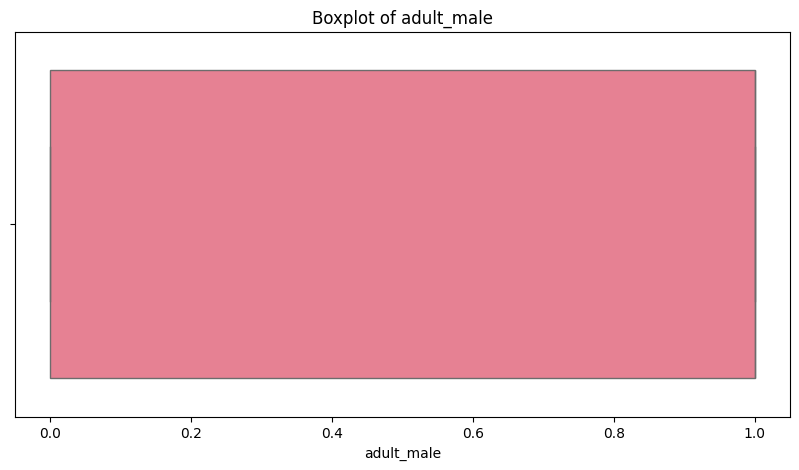

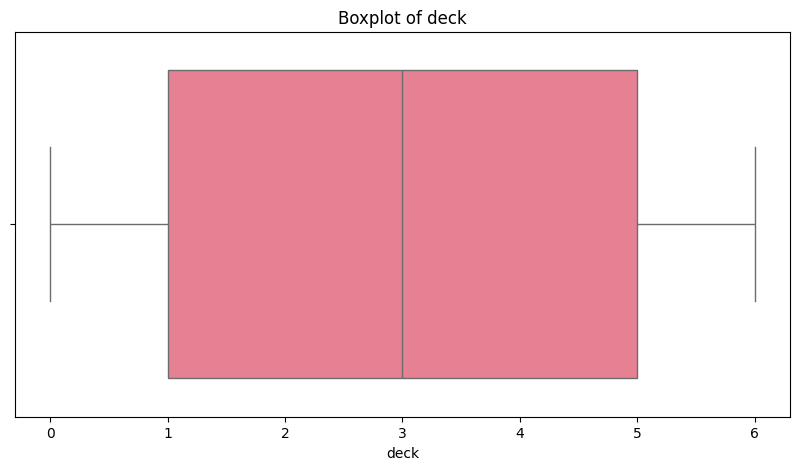

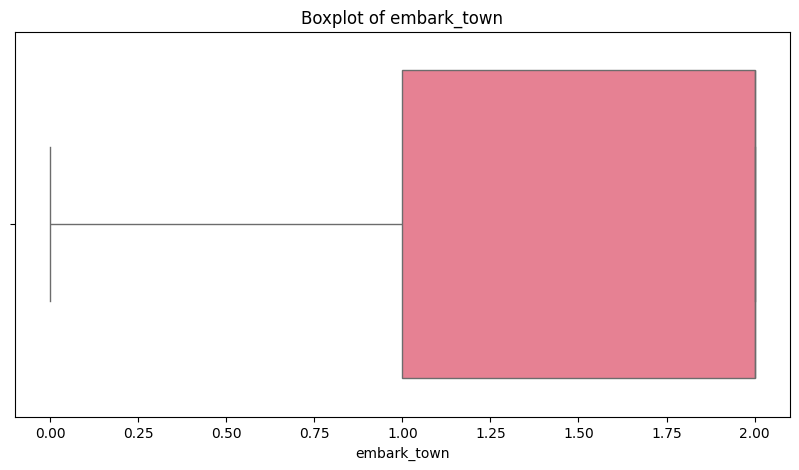

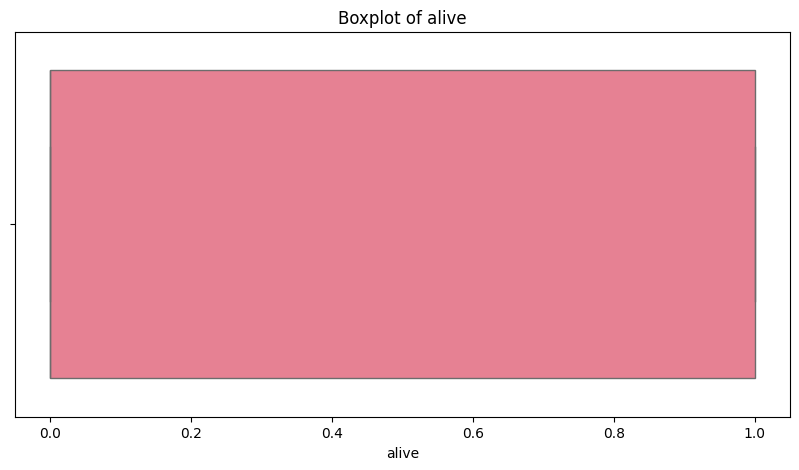

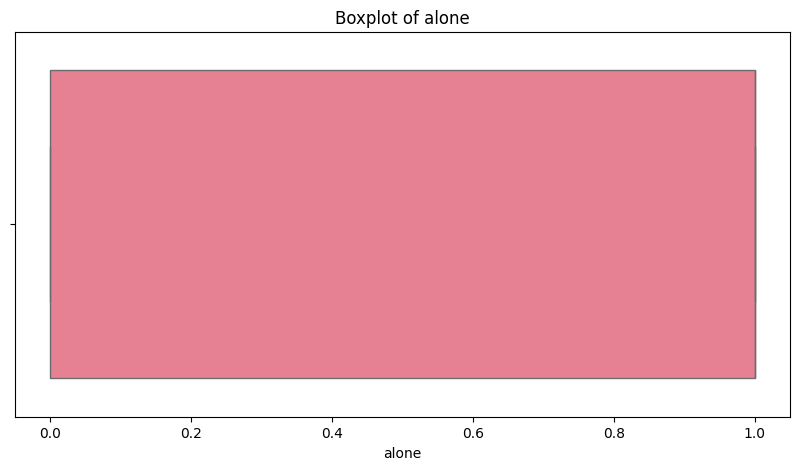

In [524]:
# show boxplot for every column

for col in data.columns:
    if data[col].dtype != 'object':
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(f'Boxplot of {col}')
        bp = sns.boxplot(data=data, x=col)
        plt.show()

In [525]:
data.drop(data[data['age'] > 60].index, axis=0, inplace=True)
data.drop(data[data['age'] < 5].index, axis=0, inplace=True)

In [526]:
data.drop(data[data['fare'] > 100].index, axis=False, inplace=True)

In [527]:
# split the data to input and output(lable)
x = data.iloc[:,:11]
x['alone'] = data['alone']
y = data.iloc[:, 11]
print(x)
print(y)

     pclass   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0         3  22.0      1      0   7.2500         2      2    1           1   
1         1  38.0      1      0  71.2833         0      0    2           0   
2         3  26.0      0      0   7.9250         2      2    2           0   
3         1  35.0      1      0  53.1000         2      0    2           0   
4         3  35.0      0      0   8.0500         2      2    1           1   
..      ...   ...    ...    ...      ...       ...    ...  ...         ...   
884       2  27.0      0      0  13.0000         2      1    1           1   
885       1  19.0      0      0  30.0000         2      0    2           0   
886       3  28.0      1      2  23.4500         2      2    2           0   
887       1  26.0      0      0  30.0000         0      0    1           1   
888       3  32.0      0      0   7.7500         1      2    1           1   

     deck  embark_town  alone  
0       2            2      0  

In [528]:
# split x data to trian and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [529]:
# StandardScaler for x data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [530]:
# logisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [531]:
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test, Y_pred)

[[90  8]
 [19 39]]


0.8269230769230769

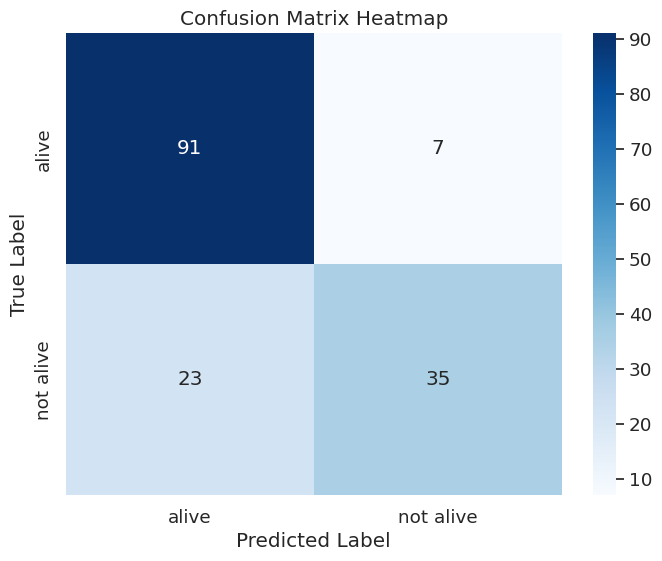

In [534]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [532]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [533]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91  7]
 [23 35]]


0.8076923076923077

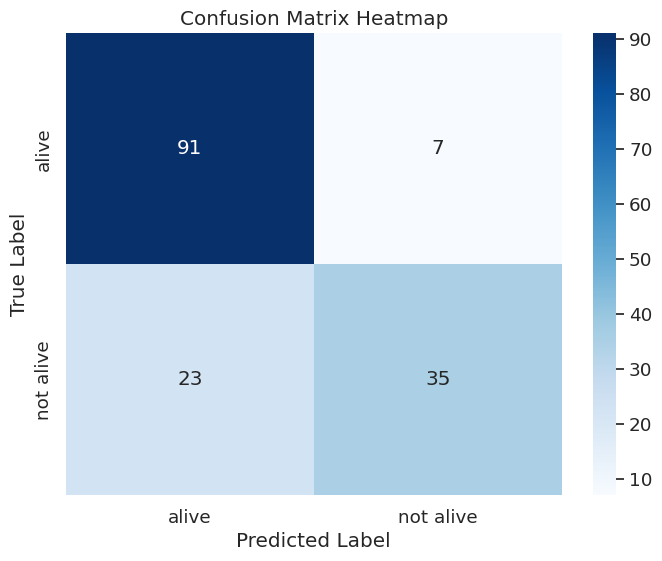

In [535]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [550]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=7)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [551]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 10]
 [17 41]]


0.8269230769230769

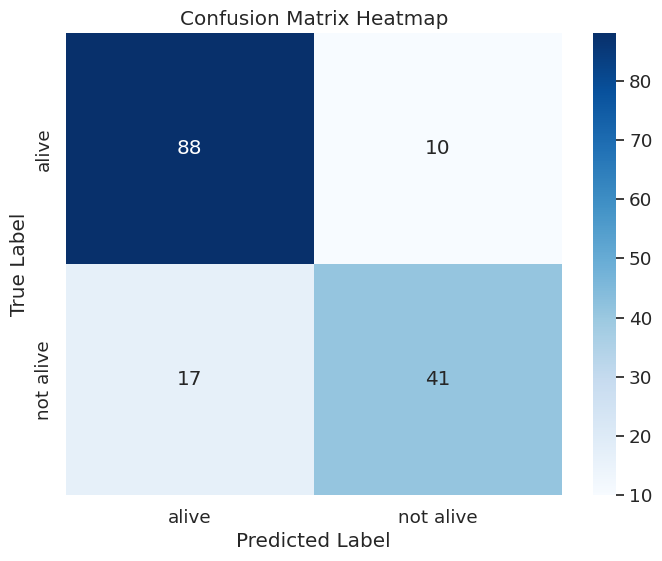

In [552]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()